In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# Exercise 1

I choose two classes of George W Bush and Tony Blair, their target value are 3 and 6 respectively. And I recode G.W.B as 1 and T.B. as -1.

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split


lfw = fetch_lfw_people(min_faces_per_person=70)
mask = np.isin(lfw.target, [3, 6])
X= lfw.images[mask]
y= lfw.target[mask]
y[y==3] = 1
y[y==6] = -1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1209)

### Question 1

k_gaussian is to compute the kernel function between two images and for the a bag of patches, I will choose to pad the image from the bottom and right side using zero to make the width and height divided by p .

In [5]:
#k is to compute the kernel function between two images

HEIGHT = 62
WIDTH  = 47
def k_gaussian(image1,image2, p = 3, sigma= 1):
    H_pad = p - HEIGHT % p
    W_pad = p - WIDTH % p
    image1_padded = np.pad(image1,((0,H_pad),(0, W_pad)),mode='constant')
    image2_padded = np.pad(image2,((0,H_pad),(0, W_pad)),mode='constant')
    H_af, W_af = image1_padded.shape
    result = np.zeros((int(H_af/p), int(W_af/p)))
    for h in range(int(H_af/p)):
        for w in range(int(W_af/p)):
            norm1 = np.sqrt(np.sum((image1_padded[p*h:p*(h+1), p*w:p*(w+1)])**2))
            norm2 = np.sqrt(np.sum((image2_padded[p*h:p*(h+1), p*w:p*(w+1)])**2))
            dist = np.sum((image1_padded[p*h:p*(h+1), p*w:p*(w+1)]/norm1 - 
                image2_padded[p*h:p*(h+1), p*w:p*(w+1)]/norm2)**2)
            result[h,w] = np.exp(- dist/sigma)
#     print(result.shape)
    return np.sum(result)

#try to compute between the first and second in train_data
k_gaussian(X_train[0],X_train[1])

326.48260857224432

### Question 2

The function will be the nearesting mean classifier using this kernel function.

In [10]:
def nearest_mean(X_train, X_test, y_train, y_test,sigma):
    n_train, n_test = len(X_train),len(X_test)
    result = np.zeros((n_train, n_test))
    for i in range(n_train):
        for j in range(n_test):
            result[i,j]= k_gaussian(X_train[i], X_test[j], sigma=sigma)
    mask1 = (y_train == 1).astype(np.int)
    mask2 = (y_train == -1).astype(np.int)
    value_1 = np.dot(result.T, mask1[:, np.newaxis])/np.sum(mask1)
    value_2 = np.dot(result.T, mask2[:, np.newaxis])/np.sum(mask2)
    
    value = np.concatenate((value_1,value_2),axis=1)
    prediction = np.where(np.argmax(value, axis=1),1,-1)
    error_rate =np.mean(prediction == y_test)
    return error_rate, value


guassian_result = []
dist_result = []
parameter_list1 = [0.001,0.01,0.1,1,10,100]
for sigma in parameter_list1:
    error_rate, value = nearest_mean(X_train, X_test, y_train, y_test,sigma=sigma)
    guassian_result.append(error_rate)
    dist_result.append(value)
    print('Finish one round!')

Finish one round!
Finish one round!
Finish one round!
Finish one round!
Finish one round!
Finish one round!


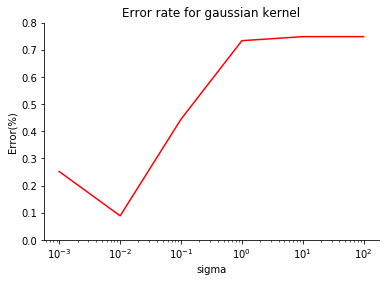

In [36]:
fig1 = plt.subplot()
fig1.spines['right'].set_visible(False)
fig1.spines['top'].set_visible(False)
fig1.plot(parameter_list1,guassian_result,color='red')
fig1.set(title= 'Error rate for gaussian kernel',ylabel='Error(%)',xlabel='sigma',ylim=(0,0.8))
fig1.set_xscale('log')

We can see from the result the optimal sigma value is around 0.01.

### Question 3

I choose to see how the order of index of George W Bush in the test set changes with the value of sigma.

In [53]:
index= np.array(range(len(y_test)))
target = np.concatenate((index[:, np.newaxis], y_test[:, np.newaxis]), axis=1)
mask1 = y_test == 1

final = pd.DataFrame()
for i in range(len(guassian_result)):    
#     temp = np.concatenate((dist_result[i][:,0][mask1], ),axis )
    temp = pd.DataFrame({'value':dist_result[i][:,0][mask1], 'Index':index[mask1]})
    msg = "sigma:{%f}"%parameter_list1[i]
    final[msg] = temp.sort_values(['value'],ascending=False).Index
final.head(10)

,sigma:{0.001000},sigma:{0.010000},sigma:{0.100000},sigma:{1.000000},sigma:{10.000000},sigma:{100.000000}
95,126,126,126,126,126,126
25,39,39,39,39,39,39
24,38,38,38,38,38,38
34,51,51,51,51,51,51
37,55,55,55,55,55,55
21,34,34,34,34,34,34
38,56,56,56,56,56,56
77,106,106,106,106,106,106
46,65,65,65,65,65,65
91,122,122,122,122,122,122


I will display the first 10 to save some space here. Actually the ranking is exactly the same, which makes sense here because the sigma only change the value of distance in the feature space, but the way we measure them is the same in essence. So the rank won't change at all

# Exercise 2

In [49]:
# mask = np.isin(lfw.target_names, ['George W Bush', 'Tony Blair'])
# mask
# np.unique(lfw.target)
# np.unique(lfw.target_names)
# len(mask)
# X.shape
# for i in range(int(48/3)):
#     print(i)

(np.array([[1,3],[2,4]]))**2

array([[ 1,  9],
       [ 4, 16]])